# Assignmnet 1


---


## Name: Aayushmaan Hooda
## Zid:  5518413


---


In [31]:
#zid : 5518413
#name : Aayushmnaan Hooda

import pandas as pd
import numpy as np
import datetime
import copy
from tabulate import tabulate
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from keras.callbacks import ReduceLROnPlateau
from keras.metrics import Precision, BinaryAccuracy
from sklearn.metrics import accuracy_score,precision_score,confusion_matrix,recall_score,f1_score , mean_squared_error, mean_absolute_error

In [32]:
# Load the dataset from the specified Excel file
data = pd.read_excel(r'AirQualityUCI _ Students.xlsx')

# Replace all occurrences of -200 with NaN (Not a Number) for easier handling of missing data
data = data.replace(-200, np.nan)

# List of all the necessary columns from our excel data
input_columns = ['NMHC(GT)' ,'PT08.S1(CO)', 'C6H6(GT)', 'PT08.S2(NMHC)', 'NOx(GT)', 'NO2(GT)', 'PT08.S4(NO2)', 'T', 'RH', 'AH', 'PT08.S5(O3)', 'CO(GT)']


# Calculate the mean of the columns and replace NaN values in the column with the calculated mean
for x in input_columns:
    data[x] = data[x].fillna(data[x].mean().round(2))


# **Classification Task**




In [33]:

#threshold value
mean_value= round(data['CO(GT)'].mean(), 2)

# List of columns to be used as input features for the classification task
classification_input = ['PT08.S1(CO)', 'C6H6(GT)', 'PT08.S2(NMHC)', 'NOx(GT)', 'NO2(GT)', 'PT08.S4(NO2)', 'T', 'RH', 'AH', 'PT08.S5(O3)']

# Create a deep copy of the data DataFrame to avoid modifying the original dataset during classification preprocessing and modeling
classification_data = copy.deepcopy(data)

# Create a new column output, which stores binary values based on threshold (mean_value)
classification_data['output'] = np.where(classification_data['CO(GT)'] > mean_value, 1, 0)

# Define the input features and the output variable for the classification task
input = classification_input
output = 'output'

# Split the data into training and testing sets
# 'classififctaion_data[input]' contains the input features
# 'classififctaion_data[output]' contains the target variable
# 'test_size=0.2' indicates that 20% of the data will be used for testing and 80% for training
# 'random_state=42' ensures reproducibility by setting a seed for the random number generator
x_train, x_test, y_train, y_test = train_test_split(classification_data[input], classification_data[output], test_size=0.2, random_state=42)


In [34]:
# Create a pipeline for data preprocessing
pipeline = Pipeline([
    ('scaler', StandardScaler())
])
#Fit the scaler to the data and transform the data for training and testing
x_train = pipeline.fit_transform(x_train)
x_test = pipeline.fit_transform(x_test)

In [35]:
# Create the nueral network model with initializing model
classification_model = Sequential()

classification_model.add(Dense(32, input_dim=x_train.shape[1], activation='sigmoid'))
classification_model.add(Dense(16, activation='relu', use_bias=True ))
classification_model.add(Dropout(0.1))
classification_model.add(Dense(4, activation='relu', use_bias=True))


#output layer
classification_model.add(Dense(1, activation='sigmoid'))

# Compile the model
classification_model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=[BinaryAccuracy(), Precision()])

# Train the model
# - batch_size: Number of samples per gradient update (32)
# - validation_split: Fraction of training data to be used as validation data (20%)
trainig = classification_model.fit(x_train, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=0)


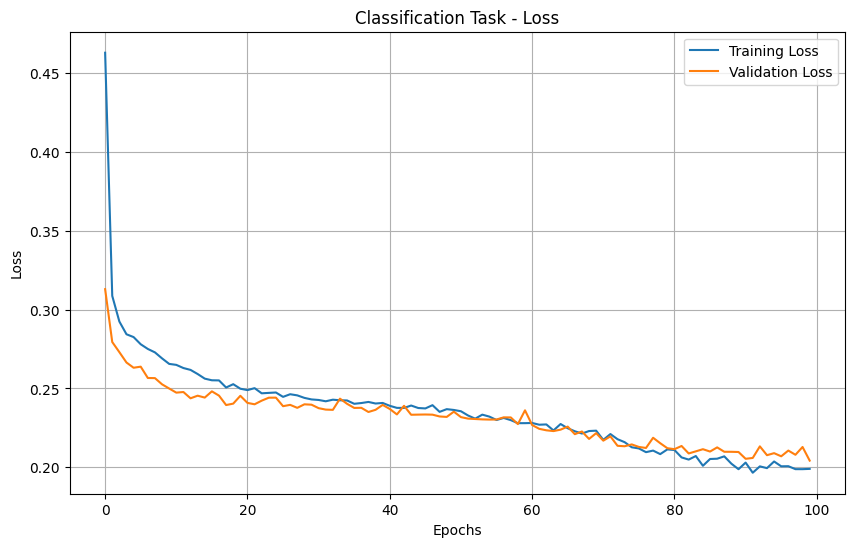

In [36]:
# Plot the training and validation loss
plt.figure(figsize=(10, 6))
plt.plot(trainig.history['loss'], label='Training Loss')
plt.plot(trainig.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Classification Task - Loss')
plt.legend()
plt.grid(True)
plt.show()

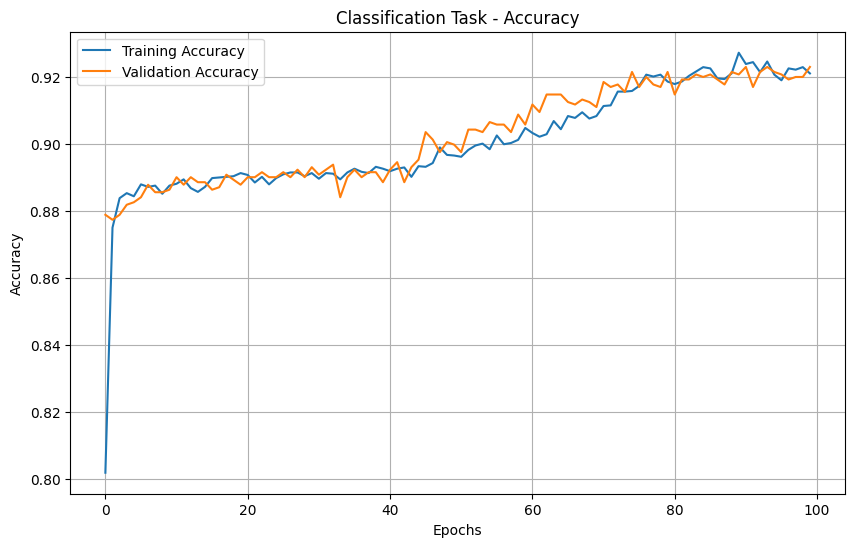

In [37]:
# Plot the training and validation accuracy
plt.figure(figsize=(10, 6))
plt.plot(trainig.history['binary_accuracy'], label='Training Accuracy')
plt.plot(trainig.history['val_binary_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Classification Task - Accuracy')
plt.legend()
plt.grid(True)
plt.show()




In [38]:
# Predict on the test set
prediction = classification_model.predict(x_test)

#Evaluate the model on the test set
loss, accuracy, precision = classification_model.evaluate(x_test, y_test, verbose=0)

# Compute the confusion matrix and unpack the values into
#true negatives (tn), false positives (fp), false negatives (fn), and true positives (tp)
tn, fp, fn, tp= confusion_matrix(y_test, prediction.round()).ravel()


#Convert the confusion matrix into a DataFrame for better visualization
#conf_matrix_df = pd.DataFrame(conf_matrix, index=['Positive (Predicted)', 'Negative (Predicted)'], columns=['Positive (Actual)', 'Negative (Actual)'])
conf_matrix_data = [
    ["Positive (Predicted)", tp, fp],
    ["Negative (Predicted)", fn, tn]
]
headers = ["Confusion Matrix", "Positive (Actual)", "Negative (Actual)"]

print(tabulate(conf_matrix_data, headers=headers, tablefmt='fancy_grid'))





53/53 [==============================] - 0s 2ms/step
╒══════════════════════╤═════════════════════╤═════════════════════╕
│ Confusion Matrix     │   Positive (Actual) │   Negative (Actual) │
╞══════════════════════╪═════════════════════╪═════════════════════╡
│ Positive (Predicted) │                 489 │                  56 │
├──────────────────────┼─────────────────────┼─────────────────────┤
│ Negative (Predicted) │                  91 │                1036 │
╘══════════════════════╧═════════════════════╧═════════════════════╛


In [39]:

# Compute metrics
accuracy = accuracy_score(y_test, prediction.round())
precision = precision_score(y_test, prediction.round())
samples = len(y_test)

info = [["CO(GT) classification", f"{accuracy * 100.0:.0f}%", f"{precision * 100.0:.0f}%", samples]]

# Column headers
headers = ["", "Accuracy", "Precision", "Number of Samples"]

# Print the table
print(tabulate(info, headers=headers, tablefmt="fancy_grid"))





╒═══════════════════════╤════════════╤═════════════╤═════════════════════╕
│                       │ Accuracy   │ Precision   │   Number of Samples │
╞═══════════════════════╪════════════╪═════════════╪═════════════════════╡
│ CO(GT) classification │ 91%        │ 90%         │                1672 │
╘═══════════════════════╧════════════╧═════════════╧═════════════════════╛


# **Regression Task**

*NOTE: In order to run regression task seprately please  first run the 1st and 2nd cell*

In [40]:
# List of columns to be used as input features for the regression task
regression_input = ['PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)', 'PT08.S2(NMHC)', 'NO2(GT)', 'PT08.S4(NO2)', 'T', 'RH', 'AH', 'CO(GT)','PT08.S5(O3)']

# Target variable for the regression task
reg_output = 'NOx(GT)'

regression_data = copy.deepcopy(data)

# Extract the input features and target variable values from the regression_data DataFrame
input_ = regression_data[regression_input].values
output_ = regression_data[reg_output].values

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(input_, output_, test_size=0.2, random_state=42)




In [41]:
# Create a pipeline for data preprocessing
pipeline = Pipeline([
    ('scaler', StandardScaler())
])
## Fit the scaler to the data and transform the data for training and testing
x_train = pipeline.fit_transform(x_train)
x_test = pipeline.fit_transform(x_test)

In [42]:
#building neural network
reg_model = Sequential()
reg_model.add(Dense(32, input_dim=x_train.shape[1], activation='relu'))
reg_model.add(Dense(16, activation='relu'))
reg_model.add(Dropout(0.1))
reg_model.add(Dense(4, activation='relu'))

#output layer
reg_model.add(Dense(1, activation='linear'))

reg_model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

# Train the model
reg_train = reg_model.fit(x_train, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=0)

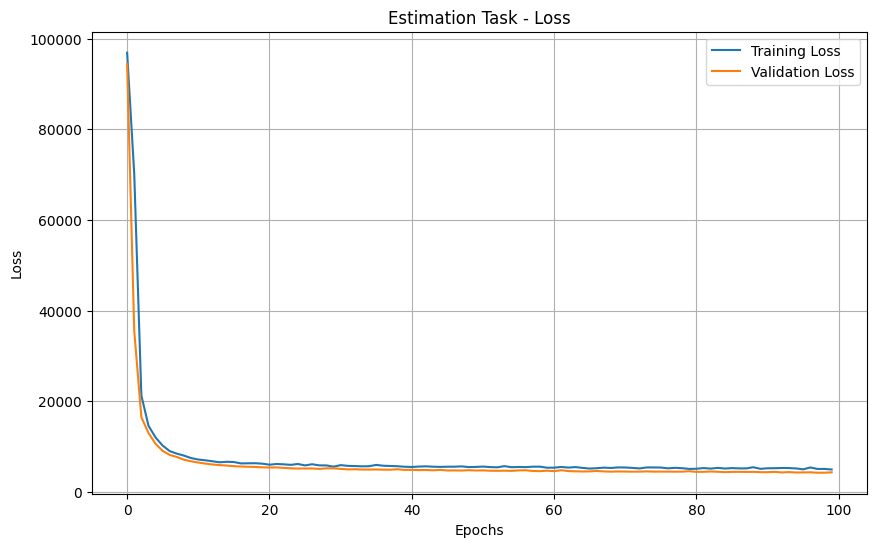

In [43]:
plt.figure(figsize=(10, 6))
plt.plot(reg_train.history['loss'], label='Training Loss')
plt.plot(reg_train.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Estimation Task - Loss')
plt.legend()
plt.grid(True)
plt.show()

1672
53/53 [==============================] - 0s 2ms/step


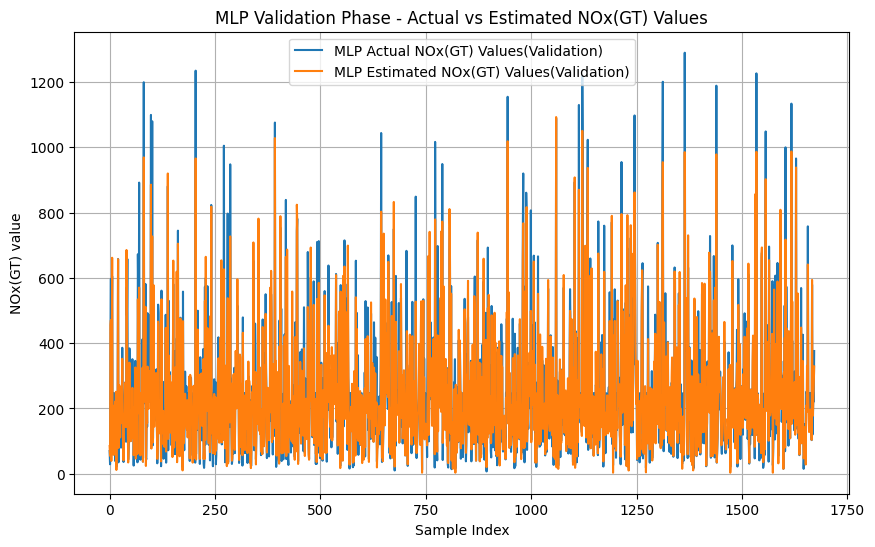

In [44]:
# # Predict on the test set
print(len(x_test))
prediction_reg = reg_model.predict(x_test)
plt.figure(figsize=(10, 6))
plt.plot(y_test, label='MLP Actual NOx(GT) Values(Validation)')
plt.plot(prediction_reg, label='MLP Estimated NOx(GT) Values(Validation)')
plt.title('MLP Validation Phase - Actual vs Estimated NOx(GT) Values')
plt.xlabel('Sample Index')
plt.ylabel('NOx(GT) value')
plt.legend()
plt.grid(True)
plt.show()

In [45]:
rmse= round(np.sqrt(mean_squared_error(prediction_reg, y_test)),3)
mae = round(mean_absolute_error(prediction_reg, y_test),3)
samples= len(x_test)

data = [[f"{rmse:.2f}", f"{mae:.2f}", samples]]

# Column headers
headers = ["RMSE", "MAE", "Number of Samples"]

# Create the table
print(tabulate(data, headers=headers, tablefmt="fancy_grid"))


╒════════╤═══════╤═════════════════════╕
│   RMSE │   MAE │   Number of Samples │
╞════════╪═══════╪═════════════════════╡
│  67.59 │ 44.55 │                1672 │
╘════════╧═══════╧═════════════════════╛
